In [1]:
from __future__ import print_function

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1337)  # for reproducibility

# input image dimensions
img_rows, img_cols = 128, 128

WB=sio.loadmat('sandstone_data.mat')['Data']
Y_data = sio.loadmat('sandstone_data.mat')['L']
Y_data = (Y_data-min(Y_data))/(max(Y_data)-min(Y_data))
X_data = np.reshape(WB,(768, img_rows*img_cols))
X_train = X_data[0:768];
Y_train = Y_data[0:768];

WB1 = sio.loadmat('test_sandstone_data.mat')['Data']
X_test = np.reshape(WB1, (240, img_rows*img_cols))
Y_test = sio.loadmat('test_sandstone_data.mat')['L']
Y_test = (Y_test-min(Y_test))/(max(Y_test) - min(Y_test))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (768, 16384)
768 train samples
240 test samples


In [2]:
#test all defferent kinds regression algorithms

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

0.00648144461901


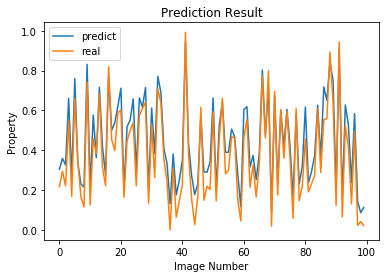

In [3]:
# Linear Regression

lire = LinearRegression()
lire.fit(X_train, Y_train)
pred = lire.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

print(mean_squared_error(Y_test, pred))

0.00647036731728
0.0001


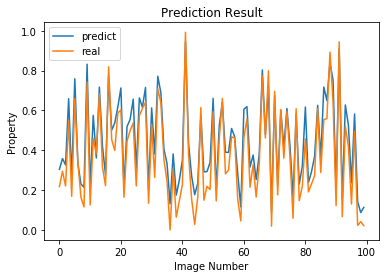

In [7]:
# RidgeCV: linear least squares with L2 regularization with bulit-in cross-validation
ridgecv = RidgeCV(alphas=(0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5, 10, 50, 100), cv=10)
ridgecv.fit(X_train, Y_train)
pred = ridgecv.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

print(mean_squared_error(Y_test, pred))
print(ridgecv.alpha_)
# ridgecv.cv_values_
# ridgecv.coef_
# ridgecv.alpha_

/Users/hechaoli/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.015478
0.0001


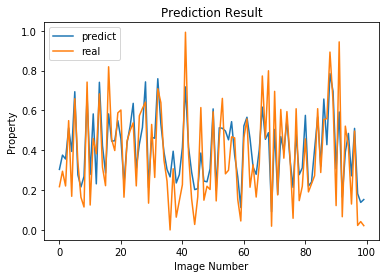

In [8]:
#LassoCV: linear model trained with L1 prior as regularizer with built-in cross-validation
lassocv = LassoCV(alphas=(0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5, 10, 50, 100), cv=10)
lassocv.fit(X_train, Y_train)
pred = lassocv.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

print(mean_squared_error(Y_test, pred))
print (lassocv.alpha_)

0.0657169
0.0001
0.001


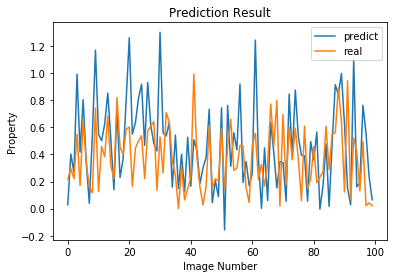

In [9]:
elasticNet = ElasticNetCV(l1_ratio = [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5],
                          alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
                          cv = 10, max_iter = 5000)
elasticNet.fit(X_train, Y_train)

pred = elasticNet.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

print (mean_squared_error(Y_test, pred))
print (elasticNet.alpha_)
print (elasticNet.l1_ratio_)

0.014945250994800678

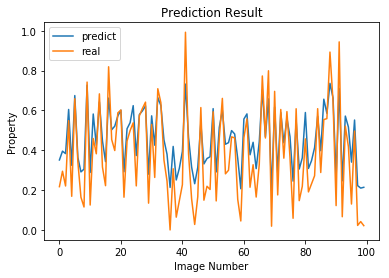

In [12]:
# SVR: epsilon-Support Vector Regression

svc = SVR()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.0069717255233866628

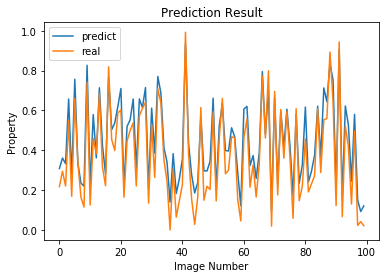

In [13]:
# LinearSVR: Linear Support Vector Regression

lisvr = LinearSVR()
lisvr.fit(X_train, Y_train)
pred = lisvr.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.0072653747166870229

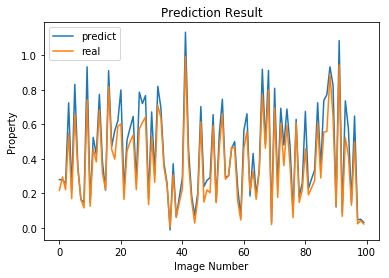

In [22]:
# MLPRegressor: Multi-layer Perceptron Regressor, optimizes the squared loss using LBFGS or SGD
mlpreg = MLPRegressor()
mlpreg.fit(X_train, Y_train)
pred = mlpreg.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.13099964

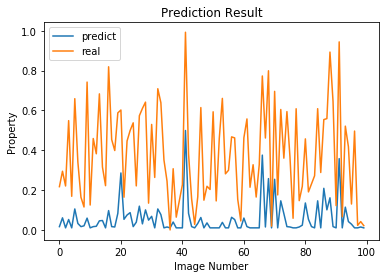

In [23]:
#KNeidgborsRegressor: K-nearest neidgbors
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.065813552873355302

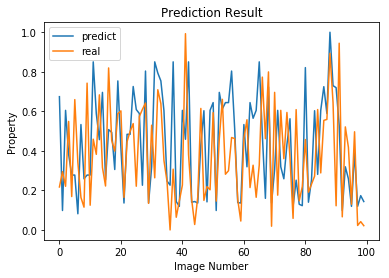

In [65]:
#Decision Tree Regressor:
dtr = DecisionTreeRegressor()
#cross_val_score(dtr, X_train, Y_train, cv=10)
dtr.fit(X_train, Y_train)
pred = dtr.predict(X_test)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.033482059858071594

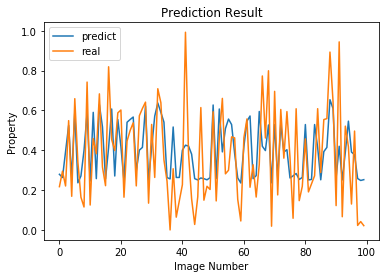

In [29]:
# AdaBoost Regressor
adaboost = AdaBoostRegressor(n_estimators=200, loss='square', learning_rate=0.5)
adaboost.fit(X_train, Y_train)
pred = adaboost.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.039588822242601109

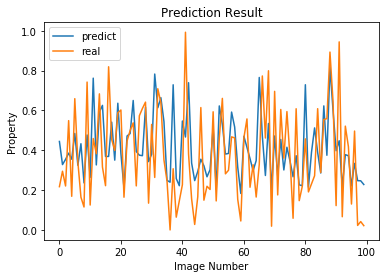

In [35]:
# Bagging Regressor:
bagging = BaggingRegressor(n_estimators=100)
bagging.fit(X_train, Y_train)
pred = bagging.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.029944191919510432

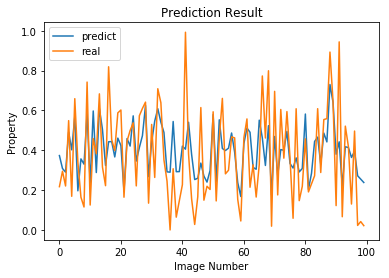

In [24]:
#Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=3)
gb.fit(X_train, Y_train)
pred = gb.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

/home/conebeam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.039704543865817378

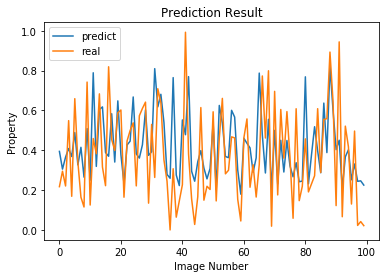

In [67]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 100) #n_estimators = # of trees
rf.fit(X_train, Y_train)
pred = rf.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

In [25]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = Y_train)
dtest = xgb.DMatrix(X_test)


params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)


model.loc[:,["test-rmse-mean", "train-rmse-mean"]].plot()

ImportError: No module named xgboost

0.039704543865817378

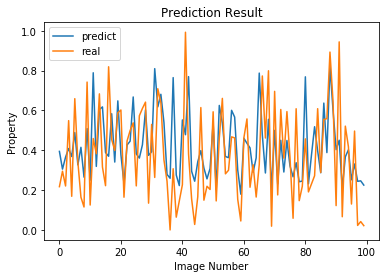

In [70]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=1, learning_rate=0.1, 
                             colsample_bytree=0.5,
                             gamma=0.0,
                             learning_rate=0.01,
                             max_depth=4,
                             min_child_weight=1.5,
                             n_estimators=10000,                                                                  
                             reg_alpha=0.9,
                             reg_lambda=0.6,
                             subsample=0.5,
                             seed=42,
                             silent=1) 

model_xgb.fit(X_train, Y_train)
model_xgb.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)